# Climate Change, Global Warming - Exploratory Data Analysis and Forecasting

In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [806]:
import warnings
warnings.filterwarnings("ignore")

In [807]:
cc = pd.read_csv('/Users/umangpandya/Downloads/Climate Change - Sheet1.csv')

### Data Look-up

In [808]:
pd.set_option('display.max_rows', None)
cc

,Year,Globe Temp Mean Celsius
0,1880,-0.17
1,1881,-0.08
2,1882,-0.11
3,1883,-0.17
4,1884,-0.28
5,1885,-0.33
6,1886,-0.31
7,1887,-0.36
8,1888,-0.17
9,1889,-0.10


In [809]:
Dates = []
for i in range(1880,2019):
    date = '31-12-'+str(i)
    Dates.append(date)

In [810]:
Dates = pd.DataFrame(Dates)
cc.Year = Dates
cc.Year = pd.to_datetime(cc.Year)
cc.set_index('Year',inplace = True)

In [811]:
cc.shape

(139, 1)

# Descriptive Analysis

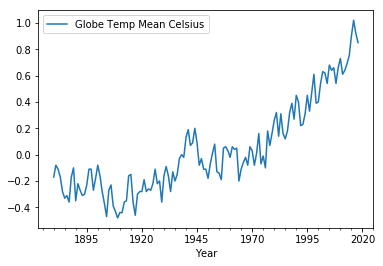

In [812]:
cc.plot()

### The Plot here shows from year 1880 till 2018 how the Global Surface mean temperature has increased vigorously

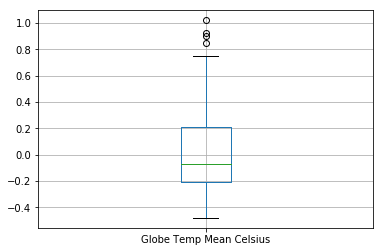

In [813]:
cc.boxplot()

### The Box and Whisker plot shows some outliers where there is  unexpected increased temperature data, 4 dots on the top as per this database.

In [814]:
from statistics import median
Q1 = cc.quantile(0.25)
Q3 = cc.quantile(0.75)
IQR = Q3-Q1
Outliers = cc [((cc <(Q1-1.5*IQR)) | (cc >(Q3+1.5*IQR))).any(axis=1)]
Outliers

,Globe Temp Mean Celsius
Year,
2015-12-31,0.90
2016-12-31,1.02
2017-12-31,0.92
2018-12-31,0.85


### Above is what we found Outlier temperatures and they are recent from this data since 2015

## Clearly since 2015 the temparatures are becoming outliers 
### - Which means as per the data these are unique observations. 
### - Which means we are having the tragedy of 'Climate Change' since 2015.

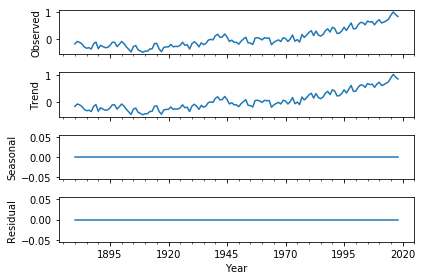

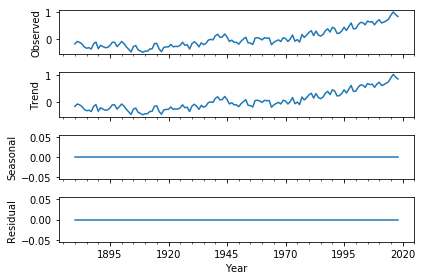

In [815]:
from statsmodels.tsa.seasonal  import seasonal_decompose
decomposition  =  seasonal_decompose(cc['Globe Temp Mean Celsius'])
decomposition.plot()


# Predictive Analysis

### Augmented Dicky - Fuller Test

In [816]:
from statsmodels.tsa.stattools  import adfuller
adfuller(cc['Globe Temp Mean Celsius'])


(1.1717974414972039,
 0.9957851189057972,
 5,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007},
 -209.4600889955173)

In [817]:
cc['first difference'] = cc['Globe Temp Mean Celsius']- cc['Globe Temp Mean Celsius'].shift(1)
adfuller(cc['first difference'].dropna())

(-7.495294370141591,
 4.395948092801758e-11,
 4,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007},
 -207.5830094456419)

#### We come into conclusion that the d value of Integration model is 1 i.e. d=1 for  'I'  in ARIMA with Pvalue = 4.395948092801758e-11 or 0.00000000004395948092801758 which is way less than 0.05 suggesting that now we can reject the null hypothesis that the data is not stationary.

### ACF - PACF for Auto Regression and Moving Average

In [818]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

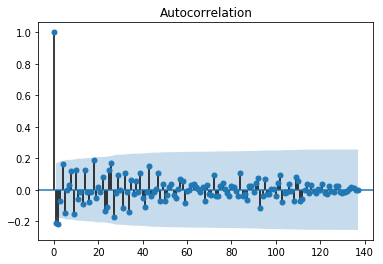

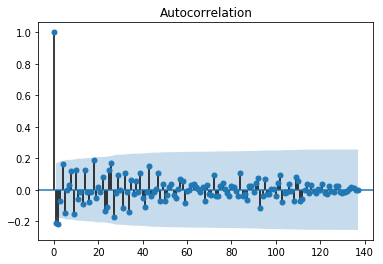

In [819]:
plot_acf(cc['first difference'].dropna())
#concluded p = 0 

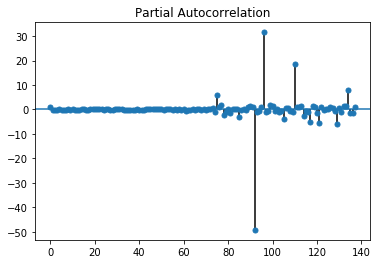

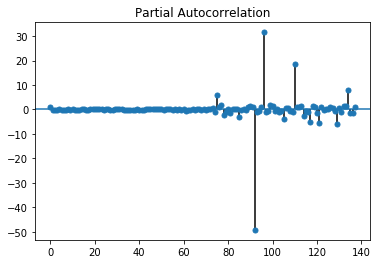

In [820]:
plot_pacf(cc['first difference'].dropna())
#concluded q = 0

### Model - Training/Testing

In [821]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(cc['Globe Temp Mean Celsius'], order = (0,1,0),seasonal_order = (0,1,0,12)) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Globe Temp Mean Celsius   No. Observations:                  139
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  54.077
Date:                            Sun, 21 Jul 2019   AIC                           -106.154
Time:                                    12:51:51   BIC                           -103.317
Sample:                                12-31-1880   HQIC                          -105.001
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0248      0.003      7.095      0.000       0.018       0.032
===================================================================================
Ljung-Box (Q):                      128.13   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.00   Prob(JB):                         0.56
Heteroskedasticity (H):               1.37   Skew:                            -0.13
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

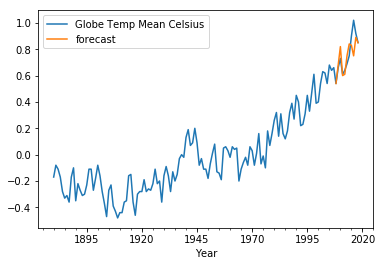

In [832]:
cc['forecast'] = result.predict(start =128, end = 138, dynamic = True)
cc[['Globe Temp Mean Celsius','forecast']].plot()

### Prediction

In [833]:
Dates2 = []
for i in range(2019,2029):
    date1 = '31-12-'+str(i)
    Dates2.append(date1)

In [834]:
Dates2 = pd.DataFrame(Dates2)
Dates2[0] = pd.to_datetime(Dates2[0])
Dates2.rename(columns = {0:'Year'},inplace = True)

In [835]:
cc.reset_index(inplace = True)

In [836]:
cc_post = pd.merge(left = cc, right = Dates2, how = 'outer')
cc_post.shape

(149, 4)

In [837]:
cc_post.set_index('Year',inplace = True)

## Below Given is the predicted visual of temperature increase in Global Annual Temperature Mean

In [838]:
cc_post['forecast'] = result.predict(start =139, end = 149, dynamic = True)

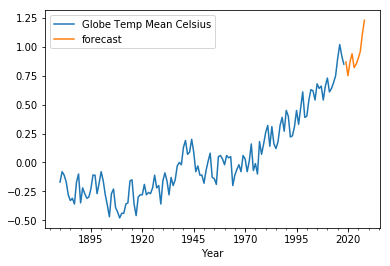

In [839]:
cc_post[['Globe Temp Mean Celsius','forecast']].plot()

### Below is the Climate Change Forecast of predicted upcoming global annual mean temperatures

In [840]:
Prediction_forecast = pd.DataFrame(cc_post['forecast'].tail(10))
Prediction_forecast

,forecast
Year,
2019-12-31,0.87
2020-12-31,0.75
2021-12-31,0.87
2022-12-31,0.94
2023-12-31,0.82
2024-12-31,0.85
2025-12-31,0.90
2026-12-31,0.96
2027-12-31,1.11


### Looking at the given forecast it is clear that the Global mean surface temparature is increasing gradually and we have enormous increase starting from 2027